<a href="https://colab.research.google.com/github/megha-puthukudi/main-project/blob/main/combine_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving images (26).jpeg to images (26) (1).jpeg
1/1 [==============================] - 1s 920ms/step


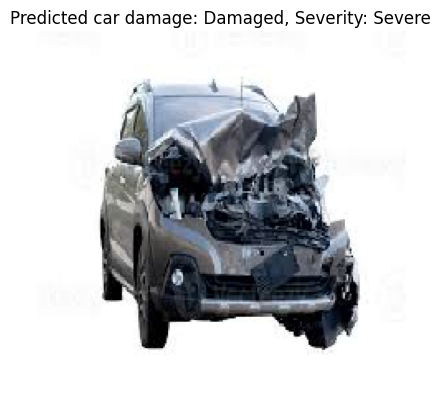

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files

# Load the models for detecting car damage and assessing damage severity
model_car_damage = tf.keras.models.load_model('/content/drive/MyDrive/colabtest/vecicle_damage_VGG16_batch16_epoch_150_changed_new_dataset.h5')
model_damage_severity = tf.keras.models.load_model('/content/drive/MyDrive/colabtest/vecicle_spot_position_VGG19_checker_epoch_100_dataset.h5')

# Define your class labels for damage severity
class_labels_severity = ['Minor', 'Moderate', 'Severe']

def predict_car_damage(file_path):
    # Load the image from the specified file path and resize it to the target size of (299, 299)
    img = load_img(file_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the input image using the preprocess_input function (specific to the model)
    processed_img = preprocess_input(img_array)
    # Use the loaded model to predict the class probabilities for the preprocessed image
    prediction = model_car_damage.predict(processed_img)
    # Find the index of the class with the highest probability
    predicted_class_index = np.argmax(prediction)
    # Retrieve the corresponding class label from the class_labels list
    predicted_class_label = 'Damaged' if predicted_class_index == 1 else 'Not Damaged'

    return predicted_class_label, img

def predict_damage_severity(file_path):
    # Load the image from the specified file path and resize it to the target size of (224, 224)
    img = load_img(file_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the input image for the damage severity model
    processed_img = preprocess_input(img_array)
    # Use the loaded model to predict the class probabilities for the preprocessed image
    prediction = model_damage_severity.predict(processed_img)
    # Find the index of the class with the highest probability
    predicted_class_index = np.argmax(prediction)
    # Retrieve the corresponding class label from the class_labels list
    predicted_class_label = class_labels_severity[predicted_class_index]

    return predicted_class_label, img

def select_image_and_predict():
    uploaded = files.upload()

    if uploaded:
        # Get the file path of the uploaded image
        file_path = list(uploaded.keys())[0]

        # Predict car damage
        predicted_car_damage, img = predict_car_damage(file_path)

        # If the car is damaged, predict the severity
        if predicted_car_damage == 'Damaged':
            predicted_damage_severity, img = predict_damage_severity(file_path)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Predicted car damage: {predicted_car_damage}, Severity: {predicted_damage_severity}")
            plt.show()
        else:
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Predicted car damage: {predicted_car_damage}")
            plt.show()
    else:
        print("No file selected.")

# Call the function to select an image and make a prediction
select_image_and_predict()


Saving images (26).jpeg to images (26) (2).jpeg
1/1 [==============================] - 1s 906ms/step


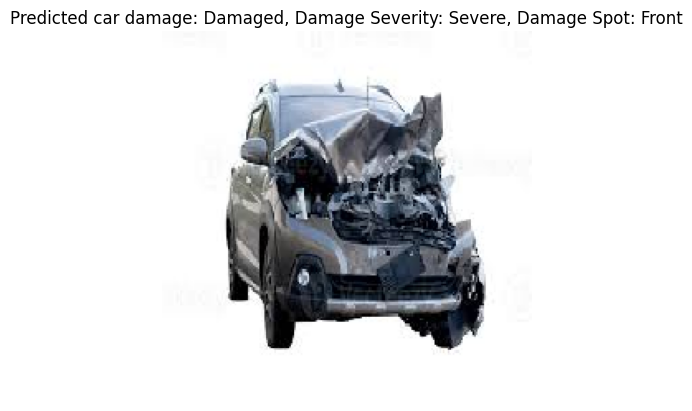

In [21]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import matplotlib.pyplot as plt
from google.colab import files

# Load the models for detecting car damage, assessing damage spot, and damage severity
model_car_damage = tf.keras.models.load_model('/content/drive/MyDrive/colabtest/vecicle_damage_VGG16_batch16_epoch_150_changed_new_dataset.h5')
model_damage_severity = tf.keras.models.load_model('/content/drive/MyDrive/colabtest/vecicle_damage_VGG19_updated.h5')
model_damage_spot = tf.keras.models.load_model('/content/drive/MyDrive/colabtest/vecicle_spot_position_VGG19_epoch_100_dataset (1).h5')

# Define your class labels for damage severity
class_labels_severity = ['Minor', 'Moderate', 'Severe']
class_labels_spot = ['Front', 'Rear', 'Side']

def predict_car_damage(file_path):
    # Load the image from the specified file path and resize it to the target size of (224, 224)
    img = load_img(file_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the input image using the preprocess_input function (specific to the model)
    processed_img = preprocess_input(img_array)
    # Use the loaded model to predict the class probabilities for the preprocessed image
    prediction = model_car_damage.predict(processed_img)
    # Find the index of the class with the highest probability
    predicted_class_index = np.argmax(prediction)
    # Retrieve the corresponding class label from the class_labels list
    predicted_class_label = 'Damaged' if predicted_class_index == 1 else 'Not Damaged'

    return predicted_class_label, img

def predict_damage_severity(file_path):
    # Load the image from the specified file path and resize it to the target size of (224, 224)
    img = load_img(file_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the input image for the damage severity model
    processed_img = preprocess_input(img_array)
    # Use the loaded model to predict the class probabilities for the preprocessed image
    prediction = model_damage_severity.predict(processed_img)
    # Find the index of the class with the highest probability
    predicted_class_index = np.argmax(prediction)
    # Retrieve the corresponding class label from the class_labels list
    predicted_class_label = class_labels_severity[predicted_class_index]

    return predicted_class_label, img

def predict_damage_spot(file_path):
    # Load the image from the specified file path and resize it to the target size of (224, 224)
    img = load_img(file_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the input image for the damage spot model
    processed_img = preprocess_input(img_array)
    # Use the loaded model to predict the class probabilities for the preprocessed image
    prediction = model_damage_spot.predict(processed_img)
    # Find the index of the class with the highest probability
    predicted_class_index = np.argmax(prediction)
    # Retrieve the corresponding class label from the class_labels list
    predicted_class_label = class_labels_spot[predicted_class_index]

    return predicted_class_label, img

def select_image_and_predict():
    uploaded = files.upload()

    if uploaded:
        # Get the file path of the uploaded image
        file_path = list(uploaded.keys())[0]

        # Predict car damage
        predicted_car_damage, img = predict_car_damage(file_path)

        # If the car is damaged, predict the damage severity
        if predicted_car_damage == 'Damaged':
            predicted_damage_severity, img = predict_damage_severity(file_path)
            predicted_damage_spot, img = predict_damage_spot(file_path)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Predicted car damage: {predicted_car_damage}, Damage Severity: {predicted_damage_severity}, Damage Spot: {predicted_damage_spot}")
            plt.show()
        else:
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Predicted car damage: {predicted_car_damage}")
            plt.show()
    else:
        print("No file selected.")

# Call the function to select an image and make a prediction
select_image_and_predict()
